# Credit Card Segmentation Model


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN,SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
%matplotlib inline

In [15]:
cc_info = pd.read_csv('CC GENERAL.csv')
cc_info.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Checking Null values

In [16]:
cc_info = cc_info.dropna()

In [17]:
cc_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [18]:
cc_info.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


In [19]:
cc_info = cc_info.drop('CUST_ID',axis = 1)

In [20]:
scaler = MinMaxScaler()
X = scaler.fit_transform(cc_info)

# Clustering Models

## DBSCAN

In [21]:
db = DBSCAN(eps=0.4,min_samples=5) # default parameter values
db.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 117
Silhouette Coefficient: 0.211
Davies Bouldin Coefficient: 2.223


## K-Means Clustering

#### Silhouette scores:

Silhouette Coefficient: 0.391
Davies Bouldin Coefficient: 1.097


<Figure size 1080x432 with 0 Axes>

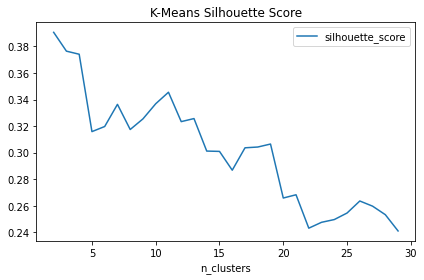

<Figure size 1080x432 with 0 Axes>

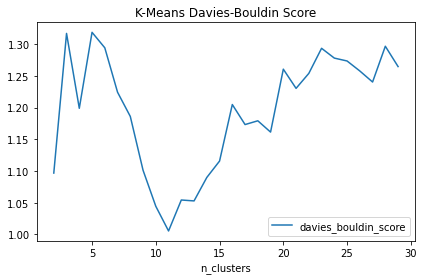

In [22]:
clusters_range=range(2, 30)
results=[]

for c in clusters_range:
    clusterer=KMeans(n_clusters=c, random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)
    results.append([c,silhouette_avg,db_index])

result  =pd.DataFrame(results, columns=["n_clusters","silhouette_score","davies_bouldin_score"])
result = result.set_index('n_clusters')

print("Silhouette Coefficient: %0.3f" % result[result.index == n_clusters_]["silhouette_score"].max())
print("Davies Bouldin Coefficient: %0.3f" % result[result.index == n_clusters_]["davies_bouldin_score"].max())

plt.figure(figsize=(15, 6))
result[["silhouette_score"]].plot(kind = 'line')
plt.title('K-Means Silhouette Score')
plt.tight_layout()

plt.figure(figsize=(15, 6))
result[["davies_bouldin_score"]].plot(kind = 'line')
plt.title('K-Means Davies-Bouldin Score')
plt.tight_layout()

## Spectral Clustering

Silhouette Coefficient: 0.393
Davies Bouldin Coefficient: 1.103


<Figure size 1080x432 with 0 Axes>

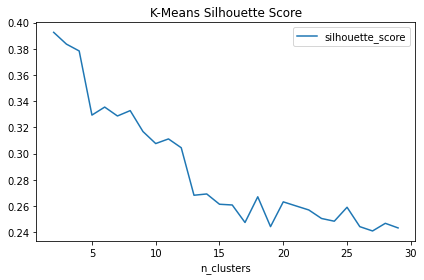

<Figure size 1080x432 with 0 Axes>

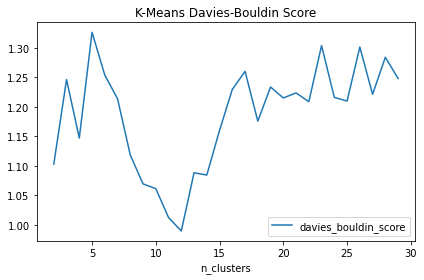

In [23]:
clusters_range=range(2, 30)
results=[]

for c in clusters_range:
    clusterer=SpectralClustering(n_clusters=c)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels)
    results.append([c,silhouette_avg,db_index])

result  =pd.DataFrame(results, columns=["n_clusters","silhouette_score","davies_bouldin_score"])
result = result.set_index('n_clusters')

print("Silhouette Coefficient: %0.3f" % result[result.index == n_clusters_]["silhouette_score"].max())
print("Davies Bouldin Coefficient: %0.3f" % result[result.index == n_clusters_]["davies_bouldin_score"].max())

plt.figure(figsize=(15, 6))
result[["silhouette_score"]].plot(kind = 'line')
plt.title('K-Means Silhouette Score')
plt.tight_layout()

plt.figure(figsize=(15, 6))
result[["davies_bouldin_score"]].plot(kind = 'line')
plt.title('K-Means Davies-Bouldin Score')
plt.tight_layout()